Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> if I can give some recommendations
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* Thank you for sending your project. You've done a really good job on it! It was interesting to check. 
* The code style is very good. I was really surprised!
* Glad to see that notebook is well-structured.
* Please name the plots and axes next time. You can use 'plt.title()', 'plt.xlabel()' and 'plt.ylabel()' for it.
* I've left some comments which could help you to improve your project and further develop your skills.
* Your project has been accepted and now you can move on to the next sprint.
* Keep up the good work, and good luck on the next sprint!

# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

<div class="alert alert-block alert-info">
<b>Improve: </b> Please, collect all imports in the first cell of the notebook next time.
</div>

In [3]:
import pandas as pd
import numpy as np

#df=pd.read_csv('/datasets/real_estate_data_us.csv')
#df.info()
#df.head(9)

# well, it looks like we'll have to do a little more work to get our csv imported. all the data is in one column! let's try separating it! 

df=pd.read_csv('/datasets/real_estate_data_us.csv', sep='\t')
df.info()
df.head(9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 no

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.00,51.00,108.00,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.00,18.60,40.40,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.30,34.30,56.00,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.00,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.00,32.00,100.00,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0
5,2018-09-10T00:00:00,55.0,57800.0,1,9.10,14.40,30.40,NaN,NaN,12.0,...,NaN,False,False,Yanino-1 village,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-11-02T00:00:00,155.0,74000.0,1,14.40,10.60,37.30,1.0,NaN,26.0,...,NaN,False,False,Pargolovo village,52996.0,19143.0,NaN,0.0,NaN,0.0
7,2019-04-18T00:00:00,NaN,158300.0,2,18.90,NaN,71.60,2.0,NaN,24.0,...,NaN,False,False,Saint Petersburg,23982.0,11634.0,NaN,0.0,NaN,0.0
8,2018-05-23T00:00:00,189.0,58000.0,1,8.81,15.43,33.16,NaN,NaN,27.0,...,NaN,False,False,Murino village,NaN,NaN,NaN,NaN,NaN,NaN


### We're Missing Some Data

We initially tried to import the dataset using the read_csv method, only to discover our first challenge! The data was all stored in a single column. By using a deliniater we can parse the csv and create a dataframe. After we did that, we were able to apply the info() and head() methods to quickly review the 

#### Data Is Misclassified 
The info() method helps us to quickly visualize information about our dataset, like the types of data and the number of rows in out dataset. Our data contains: 

* 2 bool (True/False Values) (is_studio, is_open_plan)
* 14 float (Floating Point Numbers) 
* 3 int64 (Integer Numbers) (floor, total_images, bedrooms) 
* 3 object (Text/mixed numeric values) (bike_parking, locality_name) 

#### Some Data Is Missing
Using this method we find a number of places where we may be missing data. The largest number of rows contained in any one of our columns is: 23699. That means we're potentionally missing information in the following columns: 

* days_listed - (how many days the ad was displayed (from publication to removal))
* kitchen_area - (the kitchen area in square meters (sq.m.).)
* living_area - (the living area in square meters (sq.m.))
* balconies - (the number of balconies) 
* ceiling_height - (the ceiling height in meters (m.))
* floors_total - (the total number of floors in the building) 
* bike_parking - (whether or not bike parking is available) 
* locality_name - (the name of the locality/neighborhood) 
* airport_dist - (the distance to the airport in meters) 
* city_center_dist - (the distance from the city center of St. Petersburg) 
* park_dist - (the distance between the home and the nearest park in m) 
* parks_within_3000 - (the number of parks within a 3km radius)
* pond_dist - (the distance to the nearest body of water) 
* ponds_within_3000 - (the number of ponds in a 3km radius) 

In order to preprocess our data, we'll need to make some decisions about what information is contained in these columns, and what can be done to continue our analysis. 

Thinking through this, we have a few clear opportunities.


<div class="alert alert-block alert-success">
<b>Success:</b> The first step was done perfectly! All required methods were used.
</div>

### Step 2. Data preprocessing

Let's take a quick look at the places where we're missing data. 

In [2]:
df.isnull().sum(axis = 0)


date_posted              0
days_listed           3181
last_price               0
bedrooms                 0
kitchen_area          2278
living_area           1903
total_area               0
balconies            11519
ceiling_height        9195
floors_total            86
floor                    0
total_images             0
bike_parking         20924
is_studio                0
is_open_plan             0
locality_name           49
airport_dist          5542
city_center_dist      5519
park_dist            15620
parks_within_3000     5518
pond_dist            14589
ponds_within_3000     5518
dtype: int64

### Got Our List, Let's Get to Work! 

Now that we've generated our list, let's get to work cleaning up this data! 

In [4]:
#pond_dist
#df['pond_dist'].value_counts()
#well that's not good. it looks like we only have 1096 rows with a 'pond_distance'. 
#Not having a value here must mean that the visitors live far away from a pond. Let's see what's going on in the # within count.

#ponds_within_3000 
#df['ponds_within_3000'].value_counts()
# that adds up to 18181, or 76% of our dataset. Since we know that anyone missing a value here is likely to have no ponds available, let's update this now. 
df['ponds_within_3000']=df['ponds_within_3000'].fillna(value=0)

#since anyone missing a number here is likely to have 0 parks, let's adjust. 
df['parks_within_3000']=df['parks_within_3000'].fillna(value=0)
#now let's check to make sure that worked! 
#df['ponds_within_3000'].value_counts()

#now, let's see if the same holds true for the 'parks' series. 
#df['park_dist'].value_counts()
# oh no, even fewer! 
# since this isn't too much information missing, let's use the mean. 
# we might want to improve this later on by calculating the distance for each locality independently. 

df['park_dist']=df['park_dist'].fillna(df['park_dist'].mean())
#now let's look at the city center, airport, and pond distances. we can apply the same technique, and should consider the same specificity improvement. 
df['city_center_dist']=df['city_center_dist'].fillna(df['city_center_dist'].mean())
df['airport_dist']=df['airport_dist'].fillna(df['airport_dist'].mean())
df['pond_dist']=df['pond_dist'].fillna(df['pond_dist'].mean())

#print(df['locality_name'].value_counts())
# it looks like we're only missing a few entries in 'locality_name.' Since we know this dataset is of St. Petersburg apartments and the majority of entries are in St. Petersburg, let's fill this small amount accordingly. 
df['locality_name']=df['locality_name'].fillna(value='Saint Petersburg')

#it makes sense to assume that the missing values for bike parking don't have any. 
df['bike_parking']=df['bike_parking'].fillna(value=False)

#it seems strange to only have 25 single story homes in all of the St Petersburg metro--even if it is highly urbanized! there are only 86 entries missing floors, so let's assume these are really single story structures. 
#this might be a good point to follow up on since it's also possible that these entries are apartments which are not tracking the # of floors in the building, as the metric should. 
#print(df['floors_total'].isna().sum())
df['floors_total']=df['floors_total'].fillna(value=1)

#since it's likely that missing baclonies = 0, we can quickly adjust this count. 
df['balconies']=df['balconies'].fillna(value=0)

# we'll have to get creative on estimating ceiling height, but it appears that many of these units are apartments. let's assume that the average ceiling is 2.5m, the most common value amongst these units.
df['ceiling_height']=df['ceiling_height'].fillna(value=2.50)
#we're only missing a little bit of data in living area, so we can probably use median to populate this data, but this could skew our analysis. 
df['living_area']=df['living_area'].fillna((df['living_area'].median()))

#the same applies to the kitchen_area count. 
df['kitchen_area']=df['kitchen_area'].fillna((df['kitchen_area'].median()))

# we're missing about 3000 entries in the 'days_listed' column. We might want to revise this down the road to calculate days_listed based on date_posted. 
df['days_listed']=df['days_listed'].fillna((df['days_listed'].median()))
#df['days_listed'].value_counts()

# we can increase the precision of the airport distance approximation by grouping by locality. 
#df['airport_dist'].value_counts()

df.isnull().sum()

date_posted          0
days_listed          0
last_price           0
bedrooms             0
kitchen_area         0
living_area          0
total_area           0
balconies            0
ceiling_height       0
floors_total         0
floor                0
total_images         0
bike_parking         0
is_studio            0
is_open_plan         0
locality_name        0
airport_dist         0
city_center_dist     0
park_dist            0
parks_within_3000    0
pond_dist            0
ponds_within_3000    0
dtype: int64

<div class="alert alert-block alert-info">
<b>Improve: </b> In general it's OK. It's better to avoid using constants. For example, you could fill 'ceiling_height' with median.
</div>

### We've Handled Our Duplicates! 

That wasn't so bad! We've cleaned out all of the duplicates in our data! Now let's move forward to convert our data types! 

## Changing Data Types 
We'll have a hard time working with this data if it isn't stored in the right format. We'll need to address this in a few places--but can also do it while we perform some basic calculations. Let's get started! 

<div class="alert alert-block alert-info">
<b>Improve: </b> Anyway it's better to change types here.
</div>

### Step 3. Make calculations and add them to the table

Now let's enhance our analysis by adding a few columns with key calculations to our dataframe. 

In [5]:
#first, let's find the price per square meter by using the last price and the total area. 
df['price_per_meter']=df['last_price'] / df['total_area']

#next, let's identify the week month and year when an add was first published. 
df['week_posted']=pd.to_datetime(df['date_posted']).dt.weekday
df['month_posted']=pd.to_datetime(df['date_posted']).dt.month
df['year_posted']=pd.to_datetime(df['date_posted']).dt.year

# in order to determine which unit an apartment is located on in a multiunit building, we can use a function for classification 
def floors(row): 
    if row['floor']==1:
        return 'first'
    elif row['floor'] ==row['floors_total']:
        return 'last'
    else:
        return 'other'
df['floor_position']=df.apply(floors, axis=1)

#now let's calculate the ratio between living space, and total area. we'll also calculate the ratio between the kitchen and total area
df['living_ratio'] = df['living_area']/df['total_area']
df['kitchen_ratio'] = df['kitchen_area']/df['total_area']

df

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,parks_within_3000,pond_dist,ponds_within_3000,price_per_meter,week_posted,month_posted,year_posted,floor_position,living_ratio,kitchen_ratio
0,2019-03-07T00:00:00,95.0,260000.0,3,25.00,51.0,108.00,0.0,2.70,16.0,...,1.0,755.0000,2.0,2407.407407,3,3,2019,other,0.472222,0.231481
1,2018-12-04T00:00:00,81.0,67000.0,1,11.00,18.6,40.40,2.0,2.50,11.0,...,0.0,517.9809,0.0,1658.415842,1,12,2018,first,0.460396,0.272277
2,2015-08-20T00:00:00,558.0,103920.0,2,8.30,34.3,56.00,0.0,2.50,5.0,...,1.0,574.0000,2.0,1855.714286,3,8,2015,other,0.612500,0.148214
3,2015-07-24T00:00:00,424.0,1298000.0,3,9.10,30.0,159.00,0.0,2.50,14.0,...,2.0,234.0000,3.0,8163.522013,4,7,2015,other,0.188679,0.057233
4,2018-06-19T00:00:00,121.0,200000.0,2,41.00,32.0,100.00,0.0,3.03,14.0,...,2.0,48.0000,1.0,2000.000000,1,6,2018,other,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,2017-03-21T00:00:00,95.0,194000.0,3,13.83,73.3,133.81,0.0,3.70,5.0,...,1.0,381.0000,3.0,1449.816905,1,3,2017,other,0.547792,0.103356
23695,2018-01-15T00:00:00,45.0,62000.0,3,8.50,38.0,59.00,0.0,2.50,5.0,...,0.0,517.9809,0.0,1050.847458,0,1,2018,other,0.644068,0.144068
23696,2018-02-11T00:00:00,95.0,50000.0,2,9.10,29.7,56.70,0.0,2.50,3.0,...,0.0,517.9809,0.0,881.834215,6,2,2018,first,0.523810,0.160494
23697,2017-03-28T00:00:00,602.0,229500.0,2,23.30,30.0,76.75,2.0,3.00,17.0,...,2.0,196.0000,3.0,2990.228013,1,3,2017,other,0.390879,0.303583


## Calculations Complete! 

We've calculated a price per meter, and addressed the format of our dates. We've also identified which units are on which floor, and highlighted the % of the unit that is made up of living rooms and kitchen spaces. Now let's start to analyze our data! 

<div class="alert alert-block alert-info">
<b>Improve: </b> There was no need to convert 'date_posted' to datetime 3 times if you process dtypes in the previous step.
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> These values are calculated perfectly! Well done!
</div>

### Step 4. Conduct exploratory data analysis and follow the instructions below:
First, let's begin by exploring the square area, price, number of rooms, and ceiling height. 

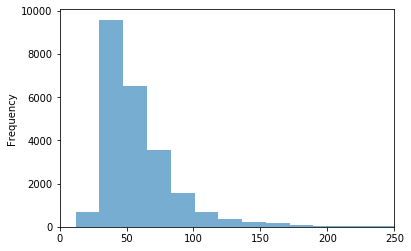

In [6]:
df['total_area'].plot.hist(bins=50, alpha=0.6, xlim=(0,250))

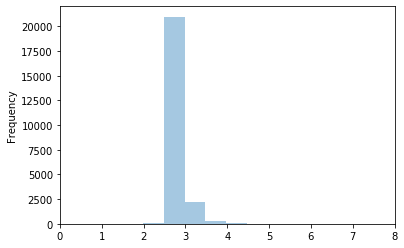

In [6]:
df['ceiling_height'].plot.hist(bins=200, alpha=0.4, xlim=(0,8))

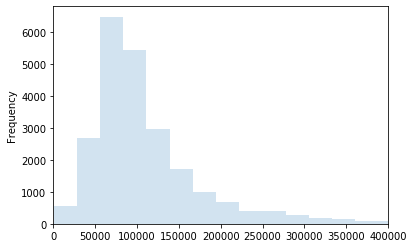

In [7]:
df['last_price'].plot.hist(bins=550, alpha=0.2, xlim=(0,400000))

Our histograms help us to clearly identify trends in our data. Now that we've identified a few key trends in the data, let's drill into these a little further by exploring how long a home is on the market. 


mean days  169.36022616988058  median days =  95.0


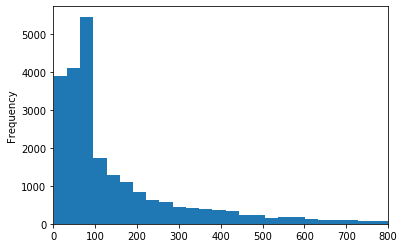

In [7]:
mean_d = df['days_listed'].mean()
median_d = df['days_listed'].median()
print("mean days ", mean_d, " median days = ", median_d)
df['days_listed'].plot.hist(bins=50, xlim=(0,800))


In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,price_per_meter,week_posted,month_posted,year_posted,living_ratio,kitchen_ratio
days_listed,1,0.065469,0.0989987,0.0811275,0.11003,0.11684,-0.0251564,0.0153429,-0.0381674,-0.0297997,-0.0401352,0.0111495,-0.0198426,-0.0208909,-0.0139837,-0.0460898,0.0135226,0.0490063,-0.045709,0.0597413,0.0320658,-0.0192048,-0.00854447,-0.576744,-0.0207528,-0.0441172
last_price,0.065469,1,0.363343,0.440316,0.540659,0.653675,0.00855938,0.0664599,-0.00708623,0.0265756,0.104473,0.0269575,-0.0253618,-0.00880212,-0.0255519,-0.201921,-0.0135596,0.19784,-0.0780133,0.208621,0.736499,0.00155015,0.00277913,-0.043089,-0.0694083,-0.121529
bedrooms,0.0989987,0.363343,1,0.25774,0.811649,0.758344,-0.0155192,0.0533562,-0.226221,-0.150862,0.0992881,0.000399275,-0.147286,-0.0875003,-0.0557559,-0.168599,-0.035384,0.157495,-0.0392605,0.121276,0.0554197,-0.00413412,-0.00446898,-0.0554185,0.259164,-0.614913
kitchen_area,0.0811275,0.440316,0.25774,1,0.411065,0.569966,0.0519109,0.0673465,0.149463,0.125566,0.106805,0.0384659,-0.0187664,-0.0125624,0.00763322,-0.171439,0.0183755,0.11405,-0.0729375,0.168567,0.360807,-0.0105396,0.00349246,-0.0539672,-0.294723,0.387482
living_area,0.11003,0.540659,0.811649,0.411065,1,0.87407,-0.00926221,0.0839307,-0.160887,-0.092847,0.105648,0.0239076,-0.0539985,-0.0323117,-0.0530539,-0.21193,-0.037162,0.204666,-0.058125,0.175262,0.213209,-0.00734305,-0.0011497,-0.0736086,0.336386,-0.467706
total_area,0.11684,0.653675,0.758344,0.569966,0.87407,1,0.00994097,0.0840308,-0.0756585,-0.0247539,0.115352,0.0296329,-0.0726533,-0.0348847,-0.0290573,-0.220448,-0.0154284,0.200211,-0.0745529,0.200294,0.30196,-0.00469472,0.00492035,-0.0799119,-0.0307877,-0.371766
balconies,-0.0251564,0.00855938,-0.0155192,0.0519109,-0.00926221,0.00994097,1,0.0411229,0.175024,0.168567,0.0489032,0.033022,0.0288987,0.0326391,0.0430594,0.0572085,0.0190811,-0.0697808,0.0122188,-0.0383394,0.0233757,-0.00149608,0.00934021,0.00456962,-0.0707708,0.0340677
ceiling_height,0.0153429,0.0664599,0.0533562,0.0673465,0.0839307,0.0840308,0.0411229,1,-0.0328007,-0.0177916,0.0120651,0.147369,-0.00087306,0.0144417,-0.0161947,-0.0667594,-0.0164446,0.0589753,-0.0357887,0.0625114,0.103157,-0.013381,-0.0046546,0.0122182,0.00571993,-0.00102305
floors_total,-0.0381674,-0.00708623,-0.226221,0.149463,-0.160887,-0.0756585,0.175024,-0.0328007,1,0.668095,0.0144828,-0.0260048,0.0672545,0.0508765,0.092752,0.0161158,0.0475805,-0.15833,0.0240732,-0.0491559,0.146704,0.0120357,0.0165533,0.00913787,-0.273136,0.334025
floor,-0.0297997,0.0265756,-0.150862,0.125566,-0.092847,-0.0247539,0.168567,-0.0177916,0.668095,1,0.0313405,-0.0132937,0.0369403,0.0358241,0.0634855,0.00805835,0.03674,-0.105212,0.0149866,-0.0297103,0.129068,0.0123468,0.0193871,0.00491456,-0.202039,0.232366


## Last Price Is Influenced By Bedrooms, Total Area, Living Area, and Price Per Meter
Now let's remove any outliers we find from our data and see how this influences the patterns we've found. 


In [9]:
from scipy import stats
import numpy as np
clean = df[(np.abs(stats.zscore(df[['days_listed', 'last_price', 'total_area']])) < 2).all(axis=1)]
clean

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,parks_within_3000,pond_dist,ponds_within_3000,price_per_meter,week_posted,month_posted,year_posted,floor_position,living_ratio,kitchen_ratio
0,2019-03-07T00:00:00,95.0,260000.0,3,25.0,51.0,108.0,0.0,2.70,16.0,...,1.0,755.0000,2.0,2407.407407,3,3,2019,other,0.472222,0.231481
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,2.50,11.0,...,0.0,517.9809,0.0,1658.415842,1,12,2018,first,0.460396,0.272277
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,2.50,5.0,...,1.0,574.0000,2.0,1855.714286,3,8,2015,other,0.612500,0.148214
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,0.0,3.03,14.0,...,2.0,48.0000,1.0,2000.000000,1,6,2018,other,0.320000,0.410000
5,2018-09-10T00:00:00,55.0,57800.0,1,9.1,14.4,30.4,0.0,2.50,12.0,...,0.0,517.9809,0.0,1901.315789,0,9,2018,other,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2017-07-07T00:00:00,413.0,27000.0,1,6.0,17.5,30.0,0.0,2.50,5.0,...,0.0,517.9809,0.0,900.000000,4,7,2017,other,0.583333,0.200000
23693,2016-08-05T00:00:00,239.0,92000.0,3,8.0,40.0,62.4,0.0,2.60,9.0,...,1.0,675.0000,1.0,1474.358974,4,8,2016,other,0.641026,0.128205
23695,2018-01-15T00:00:00,45.0,62000.0,3,8.5,38.0,59.0,0.0,2.50,5.0,...,0.0,517.9809,0.0,1050.847458,0,1,2018,other,0.644068,0.144068
23696,2018-02-11T00:00:00,95.0,50000.0,2,9.1,29.7,56.7,0.0,2.50,3.0,...,0.0,517.9809,0.0,881.834215,6,2,2018,first,0.523810,0.160494


mean days  129.80181347150258  median days =  95.0


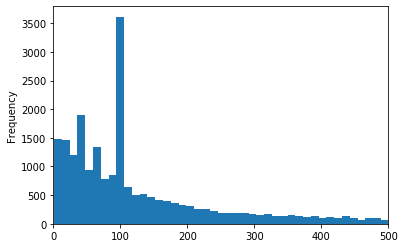

In [10]:
mean_d = clean['days_listed'].mean()
median_d = clean['days_listed'].median()
print("mean days ", mean_d, " median days = ", median_d)
clean['days_listed'].plot.hist(bins=50, xlim=(0,500))

In [11]:
corr = clean.corr()
corr.style.background_gradient(cmap='coolwarm')

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,price_per_meter,week_posted,month_posted,year_posted,living_ratio,kitchen_ratio
days_listed,1,0.0586383,0.0710479,0.0532377,0.08192,0.096143,-0.0181269,0.00756835,-0.0328055,-0.0271277,-0.0105536,-0.0117627,-0.0209875,-0.0183738,-0.000100151,-0.0077106,0.00704537,0.0262929,-0.0235882,0.0332143,-0.0138472,-0.0131896,-0.0135281,-0.442904,-0.0218246,-0.0331779
last_price,0.0586383,1,0.435047,0.533771,0.569937,0.737776,0.0523533,0.0848549,0.115267,0.0950806,0.172123,0.0222994,-0.0562567,-0.0383269,-0.0272868,-0.293406,0.0440159,0.274704,-0.056831,0.293353,0.710022,-0.018262,-0.00224654,0.0089802,-0.107608,-0.136079
bedrooms,0.0710479,0.435047,1,0.103608,0.844436,0.789671,0.00684755,0.024156,-0.222321,-0.16489,0.0957698,0.000364256,-0.168523,-0.103394,-0.0415654,-0.0994731,-0.0172568,0.0942779,-0.0116343,0.0666829,-0.105071,-0.00118678,-0.00247243,-0.0226157,0.306545,-0.646428
kitchen_area,0.0532377,0.533771,0.103608,1,0.209271,0.479044,0.075784,0.0495545,0.243531,0.174108,0.0911123,0.0193837,-0.0153465,-0.0102559,0.0162417,-0.128717,0.0411678,0.0528632,-0.0446255,0.123148,0.30467,-0.0167119,0.0106338,-0.024569,-0.361076,0.508704
living_area,0.08192,0.569937,0.844436,0.209271,1,0.870237,0.0237697,0.0540677,-0.163256,-0.119977,0.109144,0.0102727,-0.0695499,-0.0418441,-0.0433997,-0.147162,-0.0142379,0.139626,-0.0209698,0.120373,0.00505659,-0.00483763,-0.000877061,-0.0331015,0.456143,-0.57135
total_area,0.096143,0.737776,0.789671,0.479044,0.870237,1,0.0588552,0.0577037,-0.0307816,-0.0233245,0.130257,0.0197475,-0.107525,-0.0662711,-0.0159512,-0.167021,0.0165832,0.140636,-0.0335403,0.158727,0.11824,-0.0114111,0.00876332,-0.0439998,0.0152336,-0.432147
balconies,-0.0181269,0.0523533,0.00684755,0.075784,0.0237697,0.0588552,1,0.0454027,0.174702,0.165335,0.0487472,0.0360891,0.0286003,0.035434,0.0382809,0.0488539,0.0186007,-0.0675673,0.0119758,-0.0360661,0.0355893,-0.0015958,0.00538999,-0.00194527,-0.0722172,0.0234823
ceiling_height,0.00756835,0.0848549,0.024156,0.0495545,0.0540677,0.0577037,0.0454027,1,-0.0245148,-0.0136808,0.00751545,0.162761,0.000108189,0.0148804,-0.0125698,-0.0517519,-0.0123899,0.0445369,-0.0306804,0.0536579,0.110184,-0.0115581,-0.00439786,0.0200911,0.00399293,0.0103888
floors_total,-0.0328055,0.115267,-0.222321,0.243531,-0.163256,-0.0307816,0.174702,-0.0245148,1,0.666844,0.0235134,-0.0248288,0.0668507,0.0530922,0.0910303,-0.00146783,0.0469352,-0.143003,0.0255604,-0.03538,0.25798,0.0105361,0.0153342,-0.00271518,-0.284348,0.339361
floor,-0.0271277,0.0950806,-0.16489,0.174108,-0.119977,-0.0233245,0.165335,-0.0136808,0.666844,1,0.033865,-0.0135791,0.0355314,0.0375641,0.0622486,0.00170751,0.0391924,-0.0981521,0.0168708,-0.0225228,0.199113,0.0108329,0.0168043,-0.00128465,-0.207662,0.240687


## Removing Outliers Confirms Our Result 

Even with the outliers removed, we see an influence of kitchen area, living area, total area, bedrooms, and price per meter on last price. 

Let's continue our analysis by identifiying the localities with the largest number of ads, and then explore the price per square meter in these markets. 

In [12]:
top_locations = df['locality_name'].value_counts()[:10].index.to_list()
print(top_locations)
localities_df = df[df['locality_name'].isin(top_locations)].sort_values(by='price_per_meter', ascending=False).reset_index()
print("Highest Localities price\n", localities_df['price_per_meter'].head(10))
print()
print("Lowest Localities price\n", localities_df['price_per_meter'].tail(5))

['Saint Petersburg', 'Murino village', 'Shushary village', 'Vsevolozhsk', 'Pushkin', 'Kolpino', 'Pargolovo village', 'Gatchina', 'Kudrovo village', 'Vyborg']
Highest Localities price
 0    38150.000000
1    34736.842105
2    30852.096000
3    20014.962594
4    19919.678715
5    17150.857543
6    16969.696970
7    16969.696970
8    16827.586207
9    16265.060241
Name: price_per_meter, dtype: float64

Lowest Localities price
 19036    317.231435
19037    306.905371
19038    217.948718
19039    210.144928
19040      2.238532
Name: price_per_meter, dtype: float64


## We've Identified The Prices In The Top Ten Markets 
Unsurprisingly, the city center is our top result! Let's look a little closer at the apartments in the city center and see what we can find. 

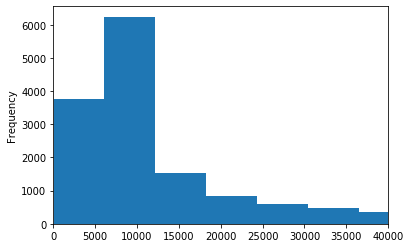

In [13]:
stP_df = df[df['locality_name'] == 'Saint Petersburg'].reset_index()
stP_df.columns
stP_df['city_center_Whole'] = stP_df['city_center_dist'].astype(int) / 1000  # Divide by 1000m since we want KM
stP_df['avgPricePerKM'] = stP_df['last_price'] / stP_df['city_center_Whole']
stP_df['avgPricePerKM'].plot.hist(bins=1200, xlim=(0,40000))

## The City Has a Diamater of 13KM. 

Based on the histogram, we can determine that after about 13 km, we begin to see results from outside of the city center. Let's use this datapoint to continue our analysis. 

In [14]:
cityDF = stP_df[stP_df['city_center_Whole'] < 13].reset_index(drop=True)
corr = cityDF.corr()
corr.style.background_gradient(cmap='coolwarm')

,index,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,price_per_meter,week_posted,month_posted,year_posted,living_ratio,kitchen_ratio,city_center_Whole,avgPricePerKM
index,1,0.0025003,-0.00481511,-0.0116849,-0.00457036,-0.0136916,-0.0143318,-0.011821,0.0199618,0.00770682,-0.00325557,0.0105579,-0.013015,0.00426953,0.00431526,0.000620155,0.00413555,0.0173253,0.00446614,-0.0167811,0.00175542,-0.00408051,0.00949074,-0.00040927,0.00837312,0.00197814,0.0117535,0.00413555,-0.0127154
days_listed,0.0025003,1,0.0736878,0.123076,0.111947,0.135365,0.142202,-0.0291154,0.0169865,-0.0558941,-0.0426611,-0.053715,0.0261751,-0.0256978,-0.0196277,-0.00569123,-0.140385,0.017246,0.0505653,-0.0493728,0.0744521,0.0403305,-0.0287402,0.0129917,-0.598877,-0.0228382,-0.0387294,-0.140385,0.0449382
last_price,-0.00481511,0.0736878,1,0.370557,0.440357,0.537888,0.656914,0.0105351,0.0576994,-0.0465046,0.0253203,0.106605,0.0344741,-0.0213638,0.000298171,-0.00687116,-0.242976,-0.0211542,0.137621,-0.10372,0.184799,0.773806,0.00890749,0.00141794,-0.0530098,-0.0847582,-0.128892,-0.242976,0.625321
bedrooms,-0.0116849,0.123076,0.370557,1,0.304202,0.807461,0.761371,-0.0574442,0.0560756,-0.253868,-0.135111,0.0615276,0.00113678,-0.116522,-0.0614152,-0.0937687,-0.333354,-0.0633069,0.134271,-0.0691627,0.113237,0.0554989,-0.0162706,0.000410447,-0.0779612,0.235022,-0.556921,-0.333354,0.209241
kitchen_area,-0.00457036,0.111947,0.440357,0.304202,1,0.437714,0.574557,0.0444302,0.0640933,0.0761294,0.0949256,0.120179,0.0538442,-0.0224693,-0.016308,0.0335194,-0.270238,0.0103208,0.114654,-0.108102,0.178252,0.350615,-0.0134684,-0.0116228,-0.0621527,-0.280576,0.387979,-0.270238,0.286056
living_area,-0.0136916,0.135365,0.537888,0.807461,0.437714,1,0.868843,-0.0358864,0.0833244,-0.187745,-0.0759733,0.0825488,0.0335723,-0.0401913,-0.026845,-0.0589403,-0.360456,-0.0579492,0.169945,-0.0838253,0.153582,0.213243,-0.017681,0.00656658,-0.0984406,0.321035,-0.432755,-0.360456,0.331828
total_area,-0.0143318,0.142202,0.656914,0.761371,0.574557,0.868843,1,-0.0140701,0.0802315,-0.105836,-0.00823582,0.0946703,0.0331267,-0.0528646,-0.0135659,-0.0250629,-0.37173,-0.0324954,0.161213,-0.107907,0.182586,0.303114,-0.00475574,0.00360992,-0.101195,-0.0512377,-0.355963,-0.37173,0.361328
balconies,-0.011821,-0.0291154,0.0105351,-0.0574442,0.0444302,-0.0358864,-0.0140701,1,0.040922,0.27186,0.243786,0.068912,0.0262842,0.0152909,0.00656205,0.0744121,0.19046,0.0352671,-0.0761807,0.00928177,-0.0399382,0.0351294,-0.000974107,0.0180232,-0.0131804,-0.0908351,0.0549261,0.19046,-0.0247146
ceiling_height,0.0199618,0.0169865,0.0576994,0.0560756,0.0640933,0.0833244,0.0802315,0.040922,1,-0.0640041,-0.0292569,0.00624545,0.225393,0.00426026,-0.00419878,-0.0105811,-0.112401,-0.0258884,0.052711,-0.046415,0.0702287,0.110397,-0.0232119,-0.00435053,0.0138427,0.0121386,0.00808181,-0.112401,0.0396516
floors_total,0.00770682,-0.0558941,-0.0465046,-0.253868,0.0761294,-0.187745,-0.105836,0.27186,-0.0640041,1,0.645472,0.0303071,-0.0198489,0.0312661,0.0405898,0.227884,0.433624,0.0328124,-0.198952,0.040394,-0.142119,0.0155026,0.0202947,0.00431447,0.037824,-0.283165,0.277766,0.433624,-0.103266


## Housing In The City Center Is The Major Driver of Expense

In analyzing our data for the city center, we determined that prices are correlated with the number of bedrooms, the total area (and kitchen and living area) and the average price per km.

In addition, our analysis revealed that the average number of days listed is 129. The median number of days listed is 95. 


<div class="alert alert-block alert-info">
<b>Improve: </b> Please, provide some answers and findings on each question next time.
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> Don't forget about the overall conclusion in future projects.
</div>

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: the price per square meter
- [x]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [x]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [x]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [x]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [x]  histograms for each parameter created
- [x]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [x]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [x]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [x]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [x]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn